In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def conjugate_gradient(G, d, m0=None, tol=1e-8, max_iter=1000):
    """
    Solves G^T G m = G^T d using the Conjugate Gradient method.

    Parameters:
    - G: Forward operator matrix (n_data × n_model)
    - d: Observed data vector (n_data,)
    - m0: Initial model guess (n_model,), defaults to zeros
    - tol: Tolerance for convergence
    - max_iter: Maximum number of iterations

    Returns:
    - m: Estimated model parameters (n_model,)
    - misfits: List of misfit values at each iteration
    - models: List of model vectors at each iteration
    """
    A = G.T @ G # Normal matrix
    b = G.T @ d # The data vector projected into model space

    ## Initialize the model
    if m0 is None:
        m = np.zeros(G.shape[1])
    else:
        m = m0.copy()

    r = b - A @ m        # initial residual
    p = r.copy()         # initial search direction
    rs_old = np.dot(r, r) #squared Euclidean norm of the residual vector (used for scaling)

    initial_misfit = 0.5 * np.linalg.norm(G @ m - d) ** 2
    misfits = [initial_misfit]
    models = [m.copy()]

    for i in range(max_iter):
        Ap = A @ p #directional derivative (it tells us how much the residual changes in the direction of p)
        # If the residual is large and the curvature is small, take a bigger step
        # If the residual is small and the curvature is large, take a smaller step
        alpha = rs_old / np.dot(p, Ap) # step size (how far we move in the direction of p) - adaptive step sizing

        m += alpha * p #updating the current model by moving in the direction of p
        r -= alpha * Ap #updating the residual 
        # The new residual is the old residual minus the step in the direction of p

        rs_new = np.dot(r, r)

        misfit = 0.5 * np.linalg.norm(G @ m - d) ** 2
        misfits.append(misfit)
        models.append(m.copy())

        if np.sqrt(rs_new) < tol:
            print(f"Converged after {i+1} iterations.")
            break
        
        # scaling factor (how much we want to change the direction of p)
        beta = rs_new / rs_old # if the residual is small, we want to change the direction of p less
        p = r + beta * p #updating the search direction
        rs_old = rs_new

    return m, misfits, np.array(models)


In [3]:
# Simulate a forward matrix G and data vector d
np.random.seed(42)
G = np.random.rand(50, 3)  # 50 measurements, 3 unknowns (e.g., slowness per layer)
true_m = np.array([2.0, 1.5, 3.0])
d = G @ true_m + np.random.normal(0, 0.1, size=50)  # add some noise

# Solve the inverse problem using CG
estimated_m, misfits, models = conjugate_gradient(G, d)

print("True model:     ", true_m)
print("Estimated model:", estimated_m)

Converged after 3 iterations.
True model:      [2.  1.5 3. ]
Estimated model: [2.01916617 1.53439991 2.95161107]


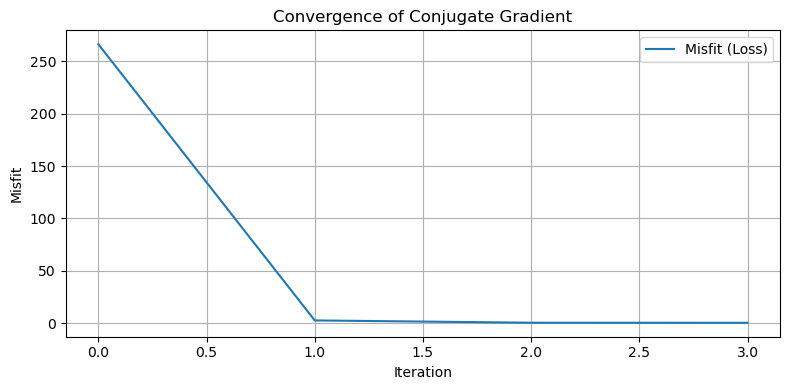

In [4]:
# === PLOT: Misfit vs Iteration ===
plt.figure(figsize=(8, 4))
plt.plot(misfits, label='Misfit (Loss)')
plt.xlabel('Iteration')
plt.ylabel('Misfit')
plt.title('Convergence of Conjugate Gradient')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

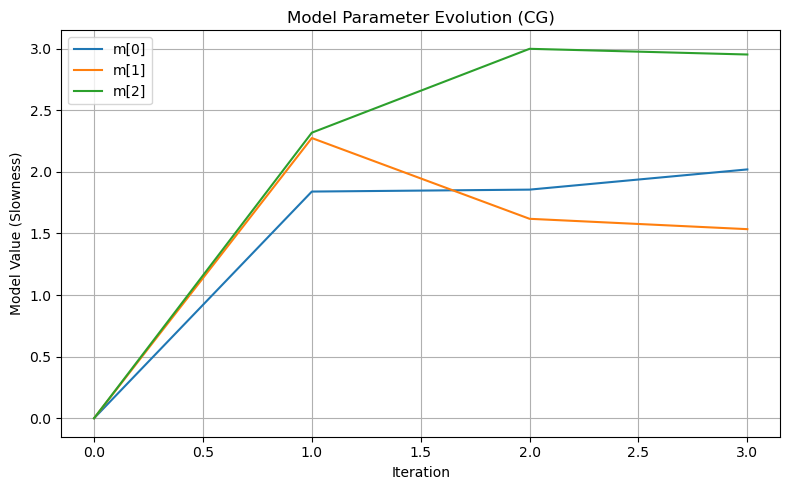

In [5]:
# === PLOT: Model Evolution ===
plt.figure(figsize=(8, 5))
for i in range(models.shape[1]):
    plt.plot(models[:, i], label=f'm[{i}]')
plt.xlabel('Iteration')
plt.ylabel('Model Value (Slowness)')
plt.title('Model Parameter Evolution (CG)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()